In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
#import statsmodels as sm
import sklearn as skl
import sklearn.preprocessing as preprocessing
import sklearn.linear_model as linear_model
import sklearn.model_selection
#import sklearn.cross_validation as cross_validation
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
import sklearn.tree as tree
import seaborn as sns

import random
import pickle

In [2]:
original_data= pd.read_csv('./adult_dataset_training.csv', index_col=0)

In [3]:
with open("split_data.pkl", "rb") as f:
    split_data = pickle.load(f)

In [4]:
X_train = split_data['X_train']
X_test = split_data['X_test']
y_train = split_data['y_train']
y_test = split_data['y_test']

In [5]:
protected_cols = ['age', 'gender', 'race', 'marital-status']

X_train = X_train[[x for x in X_train.columns if x not in protected_cols]]
X_test = X_test[[x for x in X_test.columns if x not in protected_cols]]

In [6]:
#Fucntion to encode the categorical data
def number_encode_features(df):
    result = df.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column])
    return result, encoders

In [7]:
#categorical data like marital status, occupation and relationship as integers
encoded_data, encoders = number_encode_features(original_data)

In [8]:
#scaling feature variables
scaler = preprocessing.StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train.astype(np.float64)), columns=X_train.columns)
X_test = scaler.transform(X_test.astype(np.float64))

In [9]:
cls = linear_model.LogisticRegression()

cls.fit(X_train, y_train)
y_pred = cls.predict(X_test)
y_proba = cls.predict_proba(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,12))
plt.subplot(2,1,1)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=encoders["income"].classes_, yticklabels=encoders["income"].classes_)
plt.ylabel("Real value")
plt.xlabel("Predicted value")
print ("F1 score: %f" % skl.metrics.f1_score(y_test, y_pred))

/home/ozwald/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


F1 score: 0.477387


In [41]:
print ("Accuracy score: %f" % skl.metrics.accuracy_score(y_test, y_pred))
print ("Precision score: %f" % skl.metrics.precision_score(y_test, y_pred))
print ("Recall score: %f" % skl.metrics.recall_score(y_test, y_pred))

Accuracy score: 0.813692
Precision score: 0.722826
Recall score: 0.356377


In [48]:
test_data = original_data.loc[y_test.index,:]
#test_data['score'] = np.asarray([x[1] for x in y_proba])
test_data['score'] = y_pred
test_data['label_value'] = np.where(test_data['income'] == '>50K', 1, 0)

In [49]:
test_data.head()

age  workclass  fnlwgt     education  educational-num  \
9739    19    Private  160120  Some-college               10   
2847    39    Private  186934       HS-grad                9   
6114    58    Private  186121     Bachelors               13   
16691   41  Local-gov   42346  Some-college               10   
21026   47          ?  224108       HS-grad                9   

           marital-status       occupation   relationship                race  \
9739        Never-married  Exec-managerial      Own-child  Asian-Pac-Islander   
2847   Married-civ-spouse     Craft-repair        Husband               White   
6114             Divorced  Exec-managerial  Not-in-family               White   
16691            Divorced    Other-service  Not-in-family               Black   
21026             Widowed                ?      Unmarried               White   

       gender  capital-gain  capital-loss  hours-per-week native-country  \
9739     Male          2597             0              40              ?   
2847     Male             0             0              38  United-States   
6114     Male             0             0              40  United-States   
16691  Female             0             0              24  United-States   
21026  Female             0             0              40  United-States   

      income  score  label_value  
9739   <=50K      0            0  
2847   <=50K      0            0  
6114   <=50K      0            0  
16691  <=50K      0            0  
21026  <=50K      0            0

In [30]:
from aequitas.group import Group
from aequitas.bias import Bias
from aequitas.fairness import Fairness
from aequitas.plotting import Plot
from aequitas.preprocessing import preprocess_input_df

In [14]:
df, _ = preprocess_input_df(test_data)
df.head()

age  workclass               fnlwgt     education  \
9739   17.00-28.00    Private  117646.00-178644.00  Some-college   
2847   37.00-48.00    Private  178644.00-236939.00       HS-grad   
6114   48.00-90.00    Private  178644.00-236939.00     Bachelors   
16691  37.00-48.00  Local-gov   13769.00-117646.00  Some-college   
21026  37.00-48.00          ?  178644.00-236939.00       HS-grad   

      educational-num      marital-status       occupation   relationship  \
9739       9.00-10.00       Never-married  Exec-managerial      Own-child   
2847        1.00-9.00  Married-civ-spouse     Craft-repair        Husband   
6114      12.00-16.00            Divorced  Exec-managerial  Not-in-family   
16691      9.00-10.00            Divorced    Other-service  Not-in-family   
21026       1.00-9.00             Widowed                ?      Unmarried   

                     race  gender   capital-gain  capital-loss hours-per-week  \
9739   Asian-Pac-Islander    Male  0.00-99999.00  0.00-3900.00     1.00-40.00   
2847                White    Male  0.00-99999.00  0.00-3900.00     1.00-40.00   
6114                White    Male  0.00-99999.00  0.00-3900.00     1.00-40.00   
16691               Black  Female  0.00-99999.00  0.00-3900.00     1.00-40.00   
21026               White  Female  0.00-99999.00  0.00-3900.00     1.00-40.00   

      native-country income  score  label_value  
9739               ?  <=50K      0            0  
2847   United-States  <=50K      0            0  
6114   United-States  <=50K      0            0  
16691  United-States  <=50K      0            0  
21026  United-States  <=50K      0            0

In [15]:
g = Group()
xtab, _ = g.get_crosstabs(test_data)
xtab

model_id, score_thresholds 1 {'rank_abs': [920]}


model_id score_threshold    k  attribute_name attribute_value       tpr  \
0           1      binary 0/1  920             age     17.00-28.00  0.311111   
1           1      binary 0/1  920             age     28.00-37.00  0.361798   
2           1      binary 0/1  920             age     37.00-48.00  0.364017   
3           1      binary 0/1  920             age     48.00-90.00  0.350163   
4           1      binary 0/1  920       workclass               ?  0.239130   
..        ...             ...  ...             ...             ...       ...   
115         1      binary 0/1  920  native-country   United-States  0.359049   
116         1      binary 0/1  920  native-country         Vietnam  0.000000   
117         1      binary 0/1  920  native-country      Yugoslavia  0.000000   
118         1      binary 0/1  920          income           <=50K       NaN   
119         1      binary 0/1  920          income            >50K  0.356377   

          tnr       for       fdr       fpr  ...     pprev   fp    fn    tn  \
0    0.984729  0.030082  0.525424  0.015271  ...  0.027830   31    62  1999   
1    0.952883  0.173276  0.293860  0.047117  ...  0.122121   67   284  1355   
2    0.926944  0.278729  0.262712  0.073056  ...  0.177889   93   456  1180   
3    0.947712  0.255933  0.229391  0.052288  ...  0.151795   64   399  1160   
4    0.989501  0.084951  0.266667  0.010499  ...  0.035129    4    35   377   
..        ...       ...       ...       ...  ...       ...  ...   ...   ...   
115  0.957725  0.179471  0.264846  0.042275  ...  0.120303  223  1105  5052   
116  1.000000  0.066667       NaN  0.000000  ...  0.000000    0     1    14   
117  1.000000  0.428571       NaN  0.000000  ...  0.000000    0     3     4   
118  0.957136  0.000000  1.000000  0.042864  ...  0.042864  255     0  5694   
119       NaN  1.000000  0.000000       NaN  ...  0.356377    0  1201     0   

      tp  group_label_pos  group_label_neg  group_size  total_entities  \
0     28               90             2030        2120            7815   
1    161              445             1422        1867            7815   
2    261              717             1273        1990            7815   
3    215              614             1224        1838            7815   
4     11               46              381         427            7815   
..   ...              ...              ...         ...             ...   
115  619             1724             5275        6999            7815   
116    0                1               14          15            7815   
117    0                3                4           7            7815   
118    0                0             5949        5949            7815   
119  665             1866                0        1866            7815   

         prev  
0    0.042453  
1    0.238350  
2    0.360302  
3    0.334059  
4    0.107728  
..        ...  
115  0.246321  
116  0.066667  
117  0.428571  
118  0.000000  
119  1.000000  

[120 rows x 26 columns]

In [38]:
b = Bias()
df_bias = b.get_disparity_major_group(xtab, original_df=test_data, alpha=0.05, mask_significance=False)
df_bias[df_bias['attribute_name']=='age'][['attribute_value', 'fnr', 'precision', 'fnr_disparity', 'precision_disparity']]

get_disparity_major_group()


attribute_value       fnr  precision  fnr_disparity  precision_disparity
0     17.00-28.00  0.688889   0.474576       1.000000             1.000000
1     28.00-37.00  0.638202   0.706140       0.926423             1.487939
2     37.00-48.00  0.635983   0.737288       0.923202             1.553571
3     48.00-90.00  0.649837   0.770609       0.943312             1.623784

In [39]:
f = Fairness()
fdf = f.get_group_value_fairness(bdf)
fdf

model_id score_threshold    k  attribute_name attribute_value       tpr  \
0           1      binary 0/1  920             age     17.00-28.00  0.311111   
1           1      binary 0/1  920             age     28.00-37.00  0.361798   
2           1      binary 0/1  920             age     37.00-48.00  0.364017   
3           1      binary 0/1  920             age     48.00-90.00  0.350163   
4           1      binary 0/1  920       workclass               ?  0.239130   
..        ...             ...  ...             ...             ...       ...   
115         1      binary 0/1  920  native-country   United-States  0.359049   
116         1      binary 0/1  920  native-country         Vietnam  0.000000   
117         1      binary 0/1  920  native-country      Yugoslavia  0.000000   
118         1      binary 0/1  920          income           <=50K       NaN   
119         1      binary 0/1  920          income            >50K  0.356377   

          tnr       for       fdr       fpr  ...  FNR Parity  TPR Parity  \
0    0.984729  0.030082  0.525424  0.015271  ...        True        True   
1    0.952883  0.173276  0.293860  0.047117  ...        True        True   
2    0.926944  0.278729  0.262712  0.073056  ...        True        True   
3    0.947712  0.255933  0.229391  0.052288  ...        True        True   
4    0.989501  0.084951  0.266667  0.010499  ...        True       False   
..        ...       ...       ...       ...  ...         ...         ...   
115  0.957725  0.179471  0.264846  0.042275  ...        True        True   
116  1.000000  0.066667       NaN  0.000000  ...       False       False   
117  1.000000  0.428571       NaN  0.000000  ...       False       False   
118  0.957136  0.000000  1.000000  0.042864  ...         NaN         NaN   
119       NaN  1.000000  0.000000       NaN  ...         NaN         NaN   

     TNR Parity  NPV Parity  Precision Parity  TypeI Parity  TypeII Parity  \
0          True        True              True          True           True   
1          True        True             False         False          False   
2          True       False             False         False          False   
3          True       False             False         False          False   
4          True        True              True         False          False   
..          ...         ...               ...           ...            ...   
115        True        True              True          True           True   
116        True        True               NaN         False          False   
117        True       False               NaN         False          False   
118        True        True               NaN          True            NaN   
119         NaN       False             False         False          False   

     Equalized Odds  Unsupervised Fairness  Supervised Fairness  
0              True                   True                 True  
1             False                  False                False  
2             False                  False                False  
3             False                  False                False  
4             False                  False                False  
..              ...                    ...                  ...  
115            True                   True                 True  
116           False                  False                False  
117           False                  False                False  
118           False                   True                False  
119             NaN                  False                False  

[120 rows x 62 columns]

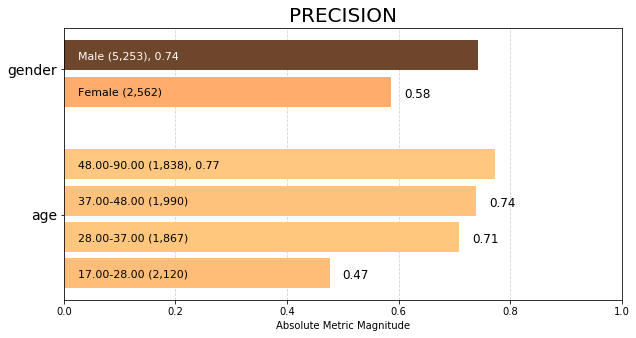

In [33]:
aqp = Plot()
aqp.plot_group_metric(xtab[(xtab['attribute_name'] == 'age') | (xtab['attribute_name'] == 'gender')], 'precision')

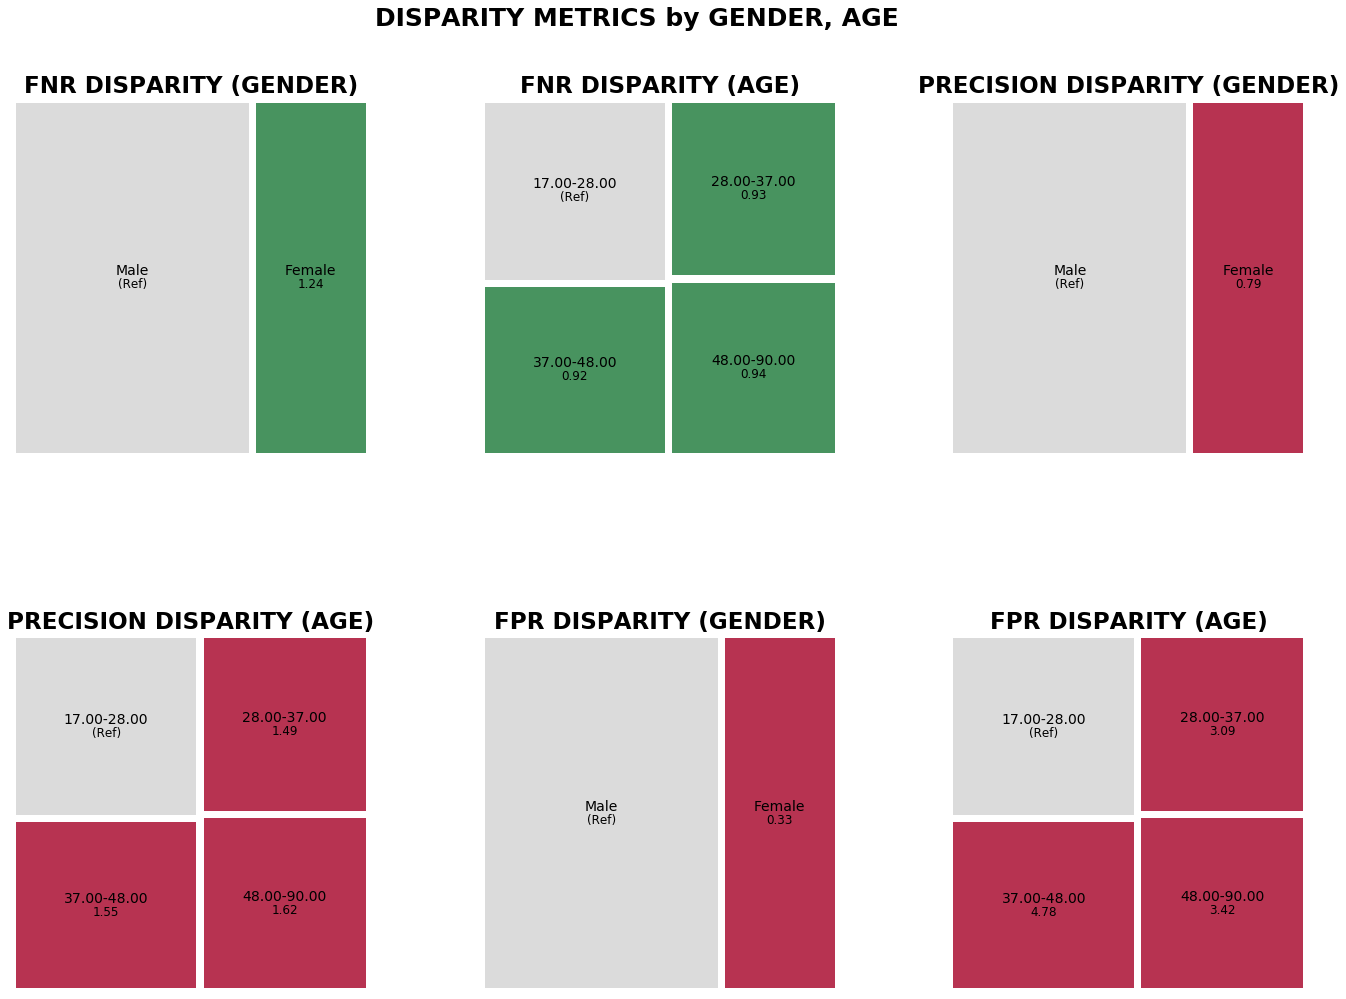

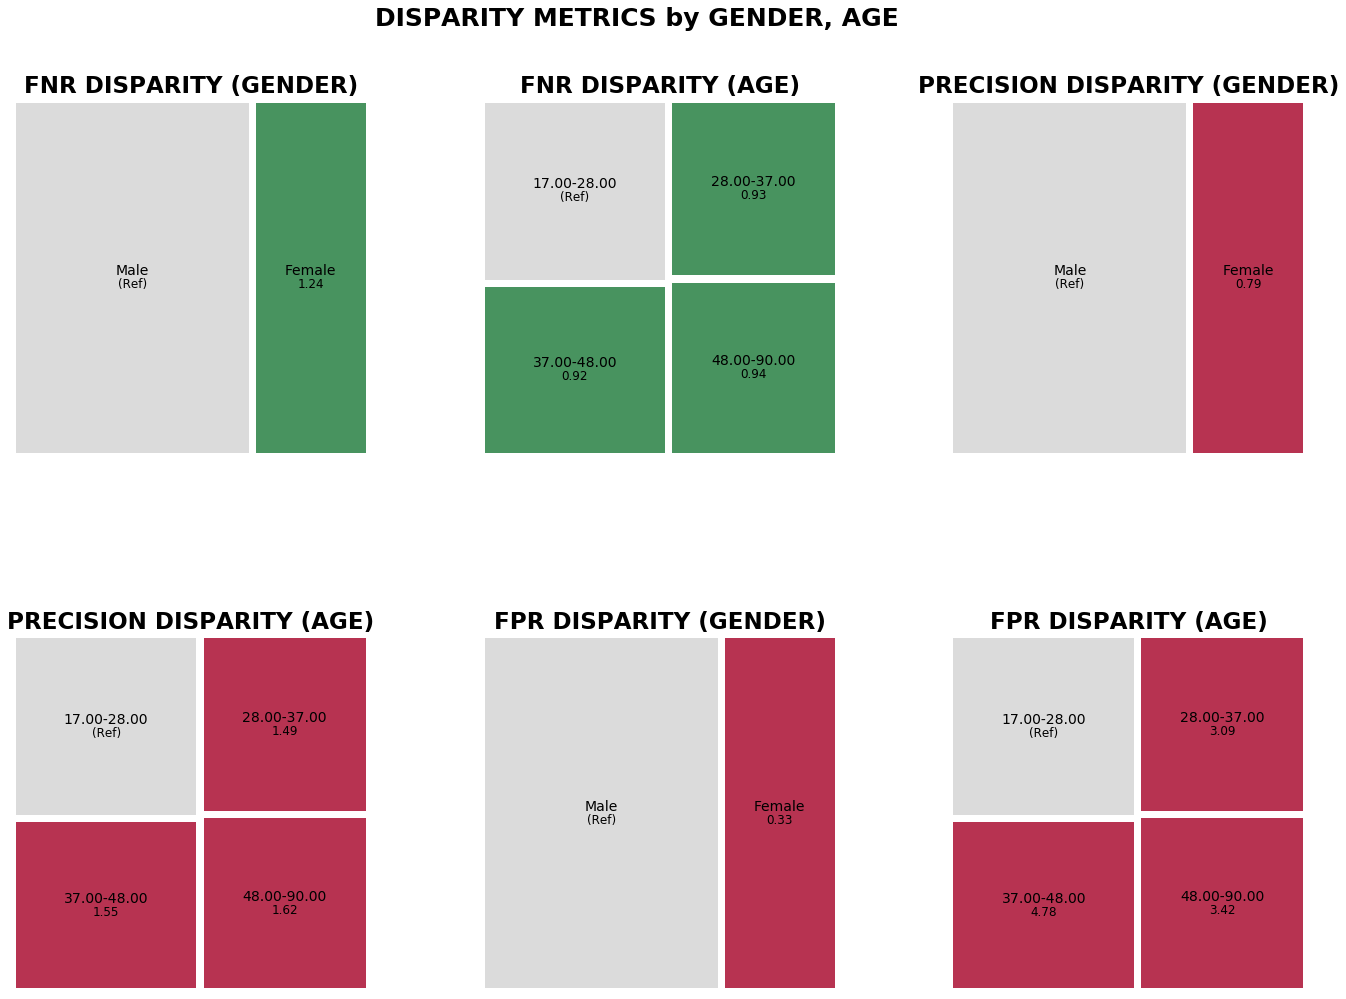

In [40]:
aqp.plot_fairness_disparity_all(fdf, attributes = ['gender','age'],metrics=['fnr','precision','fpr'])

In [16]:
xtab['percent_label_pos'] = (xtab['group_label_pos'] / xtab['group_size']) * 100.0

In [17]:
xtab[xtab['attribute_name'] == 'age']

model_id score_threshold    k attribute_name attribute_value       tpr  \
0         1      binary 0/1  920            age     17.00-28.00  0.311111   
1         1      binary 0/1  920            age     28.00-37.00  0.361798   
2         1      binary 0/1  920            age     37.00-48.00  0.364017   
3         1      binary 0/1  920            age     48.00-90.00  0.350163   

        tnr       for       fdr       fpr  ...  fp   fn    tn   tp  \
0  0.984729  0.030082  0.525424  0.015271  ...  31   62  1999   28   
1  0.952883  0.173276  0.293860  0.047117  ...  67  284  1355  161   
2  0.926944  0.278729  0.262712  0.073056  ...  93  456  1180  261   
3  0.947712  0.255933  0.229391  0.052288  ...  64  399  1160  215   

   group_label_pos  group_label_neg  group_size  total_entities      prev  \
0               90             2030        2120            7815  0.042453   
1              445             1422        1867            7815  0.238350   
2              717             1273        1990            7815  0.360302   
3              614             1224        1838            7815  0.334059   

   percent_label_pos  
0           4.245283  
1          23.835029  
2          36.030151  
3          33.405876  

[4 rows x 27 columns]

In [18]:
list(xtab)

['model_id',
 'score_threshold',
 'k',
 'attribute_name',
 'attribute_value',
 'tpr',
 'tnr',
 'for',
 'fdr',
 'fpr',
 'fnr',
 'npv',
 'precision',
 'pp',
 'pn',
 'ppr',
 'pprev',
 'fp',
 'fn',
 'tn',
 'tp',
 'group_label_pos',
 'group_label_neg',
 'group_size',
 'total_entities',
 'prev',
 'percent_label_pos']

In [19]:
def map_attribute(aoi, list_of_fields, xtab):
    subset = xtab[xtab['attribute_name'] == aoi]
    return subset[list_of_fields]

## Investigating loans scenario

In [20]:
loan_fields = ['attribute_value', 'fp', 'fn', 'tp', 'fnr','for','fpr','precision', 'group_size','group_label_pos', 'percent_label_pos']

map_attribute('age',loan_fields, xtab)

attribute_value  fp   fn   tp       fnr       for       fpr  precision  \
0     17.00-28.00  31   62   28  0.688889  0.030082  0.015271   0.474576   
1     28.00-37.00  67  284  161  0.638202  0.173276  0.047117   0.706140   
2     37.00-48.00  93  456  261  0.635983  0.278729  0.073056   0.737288   
3     48.00-90.00  64  399  215  0.649837  0.255933  0.052288   0.770609   

   group_size  group_label_pos  percent_label_pos  
0        2120               90           4.245283  
1        1867              445          23.835029  
2        1990              717          36.030151  
3        1838              614          33.405876

In [21]:
map_attribute('race',loan_fields, xtab)

attribute_value   fp    fn   tp       fnr       for       fpr  \
65  Amer-Indian-Eskimo    1     4    1  0.800000  0.047619  0.012346   
66  Asian-Pac-Islander   16    37   26  0.587302  0.195767  0.095238   
67               Black   14    52   25  0.675325  0.078669  0.022472   
68               Other    1     3    3  0.500000  0.054545  0.018868   
69               White  223  1105  610  0.644315  0.187098  0.044387   

    precision  group_size  group_label_pos  percent_label_pos  
65   0.500000          86                5           5.813953  
66   0.619048         231               63          27.272727  
67   0.641026         700               77          11.000000  
68   0.750000          59                6          10.169492  
69   0.732293        6739             1715          25.448880

In [22]:
map_attribute('gender',loan_fields, xtab)

attribute_value   fp   fn   tp       fnr       for       fpr  precision  \
70          Female   44  207   62  0.769517  0.084283  0.019189   0.584906   
71            Male  211  994  603  0.622417  0.223924  0.057713   0.740786   

    group_size  group_label_pos  percent_label_pos  
70        2562              269          10.499610  
71        5253             1597          30.401675

In [23]:
stats = map_attribute('marital-status',loan_fields, xtab)
print(np.std(stats['fnr']), np.std(stats['precision']))
stats

0.14849727944223595 0.20488529054611293


attribute_value   fp    fn   tp       fnr       for       fpr  \
37               Divorced   22    70   36  0.660377  0.069444  0.022917   
38      Married-AF-spouse    0     3    0  1.000000  0.500000  0.000000   
39     Married-civ-spouse  159  1044  569  0.647241  0.360622  0.079104   
40  Married-spouse-absent    0     5    3  0.625000  0.050000  0.000000   
41          Never-married   64    62   48  0.563636  0.025379  0.026176   
42              Separated    5     4    4  0.500000  0.017467  0.021739   
43                Widowed    5    13    5  0.722222  0.060748  0.024272   

    precision  group_size  group_label_pos  percent_label_pos  
37   0.620690        1066              106           9.943715  
38        NaN           6                3          50.000000  
39   0.781593        3623             1613          44.521115  
40   1.000000         103                8           7.766990  
41   0.428571        2555              110           4.305284  
42   0.444444         238                8           3.361345  
43   0.500000         224               18           8.035714

## Investigating Age fraud scenario

In [24]:
map_attribute('age', ['attribute_value', 'fp', 'fpr', 'fdr'], xtab)

attribute_value  fp       fpr       fdr
0     17.00-28.00  31  0.015271  0.525424
1     28.00-37.00  67  0.047117  0.293860
2     37.00-48.00  93  0.073056  0.262712
3     48.00-90.00  64  0.052288  0.229391

In [25]:
fraud_fields = ['attribute_value','fp','fpr','fdr', 'group_size', 'percent_label_pos']
map_attribute('gender',fraud_fields,xtab)

attribute_value   fp       fpr       fdr  group_size  percent_label_pos
70          Female   44  0.019189  0.415094        2562          10.499610
71            Male  211  0.057713  0.259214        5253          30.401675

In [26]:
map_attribute('marital-status',fraud_fields,xtab)

attribute_value   fp       fpr       fdr  group_size  \
37               Divorced   22  0.022917  0.379310        1066   
38      Married-AF-spouse    0  0.000000       NaN           6   
39     Married-civ-spouse  159  0.079104  0.218407        3623   
40  Married-spouse-absent    0  0.000000  0.000000         103   
41          Never-married   64  0.026176  0.571429        2555   
42              Separated    5  0.021739  0.555556         238   
43                Widowed    5  0.024272  0.500000         224   

    percent_label_pos  
37           9.943715  
38          50.000000  
39          44.521115  
40           7.766990  
41           4.305284  
42           3.361345  
43           8.035714

In [27]:
map_attribute('race',fraud_fields,xtab)

attribute_value   fp       fpr       fdr  group_size  percent_label_pos
65  Amer-Indian-Eskimo    1  0.012346  0.500000          86           5.813953
66  Asian-Pac-Islander   16  0.095238  0.380952         231          27.272727
67               Black   14  0.022472  0.358974         700          11.000000
68               Other    1  0.018868  0.250000          59          10.169492
69               White  223  0.044387  0.267707        6739          25.448880

# For Age

In [50]:
def get_status(row):
    
    result_string = ""
    
    if row['score'] == row['label_value']:
        result_string = result_string + "T"
    else:
        result_string = result_string + "F"
        
    if row['score'] == 1:
        result_string = result_string + "P"
    else:
        result_string = result_string + "N"
        
    return result_string

In [51]:
fair_data = test_data.copy()
fair_data['pred_proba'] = np.asarray([x[1] for x in y_proba])

fair_data['age_bin'] = pd.cut(fair_data['age'], bins=[17, 28, 37, 48, 90], right=False)
fair_data['score_bin'] = pd.cut(fair_data['pred_proba'], bins = np.arange(0, 1.04, 0.2), right=False)
#fair_data['outcome_type'] = fair_data.apply(get_status, axis=1)
fair_data['outcome_type'] = np.where(fair_data['score'] == fair_data['label_value'], 1, 0)

fair_data['counter'] = 1

In [52]:
fair_stats = fair_data[['age_bin', 'score_bin', 'outcome_type', 'counter']].\
             groupby(['age_bin','score_bin', 'outcome_type']).\
             agg('count').\
             reset_index()

fair_stats = fair_stats.pivot_table(index=['age_bin', 'score_bin'],
                                    columns='outcome_type', 
                                    values='counter', aggfunc='first').\
              reset_index()

fair_stats['accuracy'] = fair_stats[1] / (fair_stats[0] + fair_stats[1])

fair_stats['group_size'] = fair_stats[0] + fair_stats[1]

In [53]:
fair_stats.sort_values(["score_bin", "age_bin"])

outcome_type   age_bin   score_bin    0     1  accuracy  group_size
0             [17, 28)  [0.0, 0.2)   17  1494  0.988749        1511
5             [28, 37)  [0.0, 0.2)   77   947  0.924805        1024
10            [37, 48)  [0.0, 0.2)  151   816  0.843847         967
15            [48, 90)  [0.0, 0.2)  164   872  0.841699        1036
1             [17, 28)  [0.2, 0.4)   17   285  0.943709         302
6             [28, 37)  [0.2, 0.4)   98   352  0.782222         450
11            [37, 48)  [0.2, 0.4)  179   332  0.649706         511
16            [48, 90)  [0.2, 0.4)  173   283  0.620614         456
2             [17, 28)  [0.4, 0.6)   14    43  0.754386          57
7             [28, 37)  [0.4, 0.6)  129   143  0.525735         272
12            [37, 48)  [0.4, 0.6)  186   177  0.487603         363
17            [48, 90)  [0.4, 0.6)  123   127  0.508000         250
3             [17, 28)  [0.6, 0.8)   11     4  0.266667          15
8             [28, 37)  [0.6, 0.8)   29    49  0.628205          78
13            [37, 48)  [0.6, 0.8)   41    71  0.633929         112
18            [48, 90)  [0.6, 0.8)   25    64  0.719101          89
4             [17, 28)  [0.8, 1.0)    1     7  0.875000           8
9             [28, 37)  [0.8, 1.0)    3    54  0.947368          57
14            [37, 48)  [0.8, 1.0)    4   124  0.968750         128
19            [48, 90)  [0.8, 1.0)   11   111  0.909836         122

In [54]:
def get_bin_accuracies(stats):
    
    for score_bin in pd.unique(stats['score_bin']):
        subset = stats[stats['score_bin'] == score_bin]
        print(score_bin)
        biggest = subset[subset['group_size'] == np.max(subset['group_size'])].iloc[0]["accuracy"]
        
        for index, row in subset.iterrows():
            metric = row['accuracy'] / biggest
            print(row['age_bin'], metric)
            
    return 0

get_bin_accuracies(fair_stats)

[0.0, 0.2)
[17, 28) 1.0
[28, 37) 0.9353279001422357
[37, 48) 0.8534489561140114
[48, 90) 0.851276405493273
[0.2, 0.4)
[17, 28) 1.4525153594510494
[28, 37) 1.2039625167336012
[37, 48) 1.0
[48, 90) 0.9552222046079053
[0.4, 0.6)
[17, 28) 1.5471305382099316
[28, 37) 1.078202891326022
[37, 48) 1.0
[48, 90) 1.0418305084745763
[0.6, 0.8)
[17, 28) 0.4206572769953052
[28, 37) 0.9909714698447093
[37, 48) 1.0
[48, 90) 1.1343567020098118
[0.8, 1.0)
[17, 28) 0.9032258064516129
[28, 37) 0.9779286926994906
[37, 48) 1.0
[48, 90) 0.9391856160761501


0

# For Gender

In [55]:
fair_data = test_data.copy()
fair_data['pred_proba'] = np.asarray([x[1] for x in y_proba])
fair_data['score_bin'] = pd.cut(fair_data['pred_proba'], bins = np.arange(0, 1.04, 0.2), right=False)
fair_data['outcome_type'] = np.where(fair_data['score'] == fair_data['label_value'], 1, 0)

fair_data['counter'] = 1

In [56]:
fair_stats = fair_data[['gender', 'score_bin', 'outcome_type', 'counter']].\
             groupby(['gender','score_bin', 'outcome_type']).\
             agg('count').\
             reset_index()

fair_stats = fair_stats.pivot_table(index=['gender', 'score_bin'],
                                    columns='outcome_type', 
                                    values='counter', aggfunc='first').\
              reset_index()

fair_stats['accuracy'] = fair_stats[1] / (fair_stats[0] + fair_stats[1])

fair_stats['group_size'] = fair_stats[0] + fair_stats[1]

In [57]:
fair_stats.sort_values(["score_bin", "gender"])

outcome_type  gender   score_bin    0     1  accuracy  group_size
0             Female  [0.0, 0.2)  145  1886  0.928607        2031
5               Male  [0.0, 0.2)  265  2246  0.894464        2511
1             Female  [0.2, 0.4)   43   297  0.873529         340
6               Male  [0.2, 0.4)  424   955  0.692531        1379
2             Female  [0.4, 0.6)   43    75  0.635593         118
7               Male  [0.4, 0.6)  410   415  0.503030         825
3             Female  [0.6, 0.8)   17    11  0.392857          28
8               Male  [0.6, 0.8)   89   177  0.665414         266
4             Female  [0.8, 1.0)    3    42  0.933333          45
9               Male  [0.8, 1.0)   17   255  0.937500         272

In [58]:
def get_bin_accuracies(stats):
    
    for score_bin in pd.unique(stats['score_bin']):
        subset = stats[stats['score_bin'] == score_bin]
        print(score_bin)
        biggest = subset[subset['group_size'] == np.max(subset['group_size'])].iloc[0]["accuracy"]
        
        for index, row in subset.iterrows():
            metric = row['accuracy'] / biggest
            print(row['gender'], metric)
            
    return 0

get_bin_accuracies(fair_stats)

[0.0, 0.2)
Female 1.0381705996940565
Male 1.0
[0.2, 0.4)
Female 1.2613581767785647
Male 1.0
[0.4, 0.6)
Female 1.2635286910353276
Male 1.0
[0.6, 0.8)
Female 0.5903954802259886
Male 1.0
[0.8, 1.0)
Female 0.9955555555555555
Male 1.0


0